In [85]:
!pip install ucimlrepo
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:

# df = pd.read_csv("adult.data", delimiter=",")
# column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
#                 'marital-status', 'occupation', 'relationship', 'race', 'sex',
#                 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
#                 'income']

# df.columns = column_names

# df.head()-

In [3]:
adult = fetch_ucirepo(id=2) 


In [51]:

# fetch dataset 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  



In [52]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [53]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [54]:
X["education"].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [39]:
X["fnlwgt"].value_counts()



fnlwgt
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
286983     1
185942     1
234220     1
214706     1
350977     1
Name: count, Length: 28523, dtype: int64

In [40]:
X["education"].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [55]:
#Since the values are varied it doesnt make sense to consider this when calucation the income

X = X.drop("fnlwgt", axis=1)   
X = X.drop("education", axis=1)  

In [58]:
X["workclass"].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [9]:
print(X['workclass'].isnull().sum(), X['occupation'].isnull().sum(),X['native-country'].isnull().sum() )


963 966 274


In [56]:
# df.loc[df['native-country'].str.strip() == "?"]

# X.loc[:, 'workclass'] = X['workclass'].str.strip().replace('?', 'Private')
# X.loc[:, 'occupation'] = X['occupation'].str.strip().replace('?', 'Prof-specialty')
# X.loc[:, 'native-country'] = X['native-country'].str.strip().replace('?', 'United-States')


# X['workclass'].fillna('Private', inplace=True)
# X['occupation'].fillna('Prof-specialty', inplace=True)
# X['native-country'].fillna('United-States', inplace=True)



X.replace("?", np.NaN, inplace=True)



In [61]:
X.fillna(method="ffill",inplace=True)
X

C:\Users\navam\AppData\Local\Temp\ipykernel_10944\58843922.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method="ffill",inplace=True)


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,Private,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [62]:
income = pd.get_dummies(y["income"], drop_first=True )
y.loc[:, "income"] = y["income"].str.strip().replace('<=50K.', '<=50K')
y.loc[:, "income"] = y["income"].str.strip().replace('>50K.', '>50K')


y["income"].value_counts()


# income.head(10)

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [63]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [64]:
label_encoder = LabelEncoder()
X["workclass"] = label_encoder.fit_transform(X["workclass"])
X["marital-status"]= label_encoder.fit_transform(X["marital-status"])
X["occupation"] = label_encoder.fit_transform(X["occupation"])
X["relationship"] = label_encoder.fit_transform(X["relationship"])
X["race"] = label_encoder.fit_transform(X["race"])
X["sex"] = label_encoder.fit_transform(X["sex"])
X["native-country"] = label_encoder.fit_transform(X["native-country"])

In [65]:
X

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,13,4,0,1,4,1,2174,0,40,38
1,50,5,13,2,3,0,4,1,0,0,13,38
2,38,3,9,0,5,1,4,1,0,0,40,38
3,53,3,7,2,5,0,2,1,0,0,40,38
4,28,3,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,13,0,9,1,4,0,0,0,36,38
48838,64,3,9,6,9,2,2,1,0,0,40,38
48839,38,3,13,2,9,0,4,1,0,0,50,38
48840,44,3,13,0,0,3,1,1,5455,0,40,38


<Axes: >

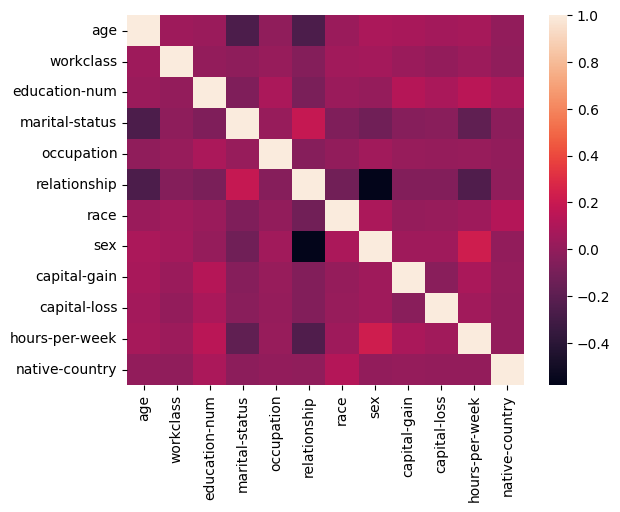

In [66]:
sns.heatmap(X.corr())

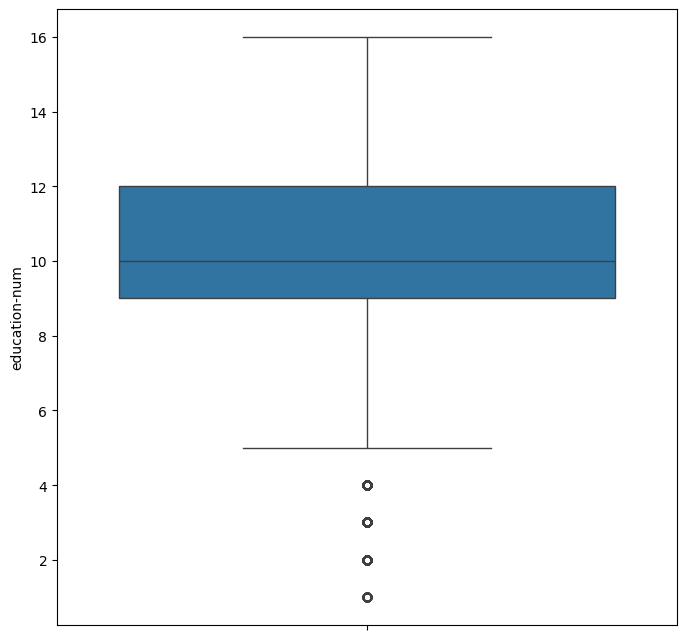

In [83]:
plt.figure(figsize=(8,8))
sns.boxplot(data=X, y="education-num")

plt.show()

In [67]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

In [68]:
len(X_train)
X_train.head()


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
24300,41,6,11,2,9,0,4,1,0,0,35,38
23419,40,3,16,2,9,0,4,1,0,0,40,38
12629,48,0,10,4,0,1,4,1,0,0,30,38
4046,23,3,9,4,6,2,2,1,0,0,40,38
34439,26,3,9,4,2,3,4,1,0,0,35,38


In [69]:
y_train.head()


,income
24300,>50K
23419,>50K
12629,<=50K
4046,<=50K
34439,<=50K


In [70]:
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

c:\Users\navam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [71]:
y_prediction = model.predict(X_test)

In [72]:
model.score(X_test,y_test)

0.8001091926567938

In [73]:
y_test

,income
9083,<=50K
25362,<=50K
10553,<=50K
9556,<=50K
34033,<=50K
...,...
8745,<=50K
30272,<=50K
42576,<=50K
3343,<=50K


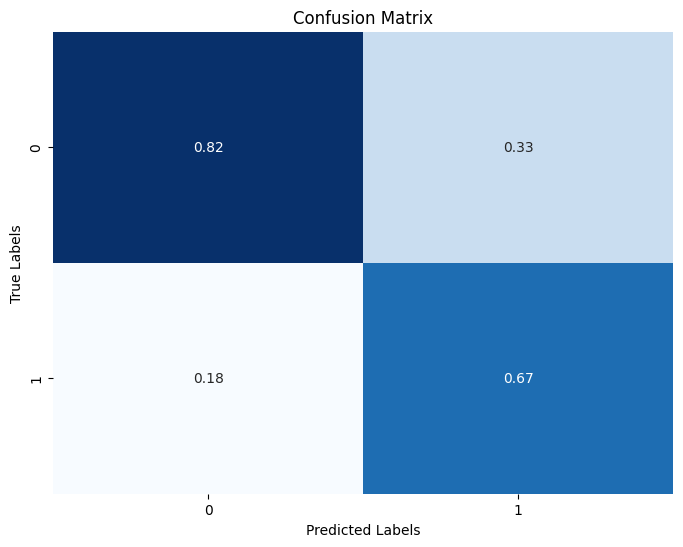

In [74]:

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')

plt.figure(figsize=(8, 6))

sns.heatmap(result, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [84]:
model2 = RandomForestClassifier(n_estimators=60)
model2.fit(X_train, y_train)

NameError: name 'RandomForestClassifier' is not defined